<a href="https://colab.research.google.com/github/valerymamontov/colab_notebooks/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Линейная регрессия  
Используется открытый набор данных по вызоввам пожарных машин в период с 2015 по 2019 годы в Москве.  
Цель - спрогнозировать число вызовов на 2020 год.  
В основу прогноза заложен метод линейной регрессии.  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
data = pd.read_csv("https://video.ittensive.com/python-advanced/data-5283-2019-10-04.utf.csv", delimiter=";")

In [ ]:
# нам нужно предсказать число вызовов пожарных машин на 2020 год
# для этого:
# группируем наши данные по столбцу год
# считаем среднее
data_avg = data.groupby("Year").mean()
data_avg

,ID,global_id,Calls,Unnamed: 6
Year,,,,
2015,66.5,4.112174e+07,427.068182,NaN
2016,198.5,1.976907e+08,422.878788,NaN
2017,330.5,5.279323e+08,458.454545,NaN
2018,462.5,8.761135e+08,599.068182,NaN
2019,578.0,9.407799e+08,580.222222,NaN


In [ ]:
data_avg.index

Int64Index([2015, 2016, 2017, 2018, 2019], dtype='int64', name='Year')

In [ ]:
len(data_avg.index)

5

In [ ]:
# готовим модель линейной регрессии
# берем индекс данных из нашей группы и преобразовываем его в таблицу
# берем вызовы и делаем тоже самое

x = np.array(data_avg.index).reshape(len(data_avg.index), 1)
y = np.array(data_avg["Calls"]).reshape(len(data_avg.index), 1)

In [ ]:
print(x)
print()
print(y)

[[2015]
 [2016]
 [2017]
 [2018]
 [2019]]

[[427.06818182]
 [422.87878788]
 [458.45454545]
 [599.06818182]
 [580.22222222]]


In [ ]:
model = LinearRegression()
model.fit(x, y)
# print(model.predict(np.array(2020).reshape(1, 1)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

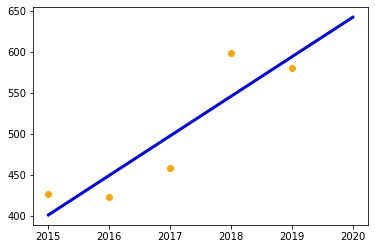

In [ ]:
# создадим график и добавим на него точки
plt.scatter(x, y, color="orange")
# добавим в таблицу 2020 год и предсказанное значение
x = np.append(x, [2020]).reshape(len(data_avg.index)+1, 1)
plt.plot(x, model.predict(x), color="blue", linewidth=3)
plt.show()